# Introduction

Cataract dataset
Cataract eye images dataset from camera images (scrapped from Bing)

# About Dataset

Cataract eye dataset
This dataset is created for practical applications of deep learning in medical field applications. All existing datasets for cataract are medical reports and not direct images, however, to create applications like cataract detector with eye image, those datasets are not useful.

# Objective

The idea is to make a create and train a classication model to classsify a images that have cataract or not. In order to do this i will use Neural Network(Deep Learning).

# Import Library

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

# Removing doubtful images

In [3]:
import cv2
import imghdr

In [4]:
dataset_dir = 'data' 

In [5]:
#I sow the images on my data set and it seems like are all png extension
img_extension = ['png']

In [6]:
#Now, verifying if are all png images, if not i will remove
for images in os.listdir(dataset_dir): 
    for final_img in os.listdir(os.path.join(dataset_dir, images)):
        image_path = os.path.join(dataset_dir, images, final_img)
        img = cv2.imread(image_path)
        #Saving the image extension on tip
        tip = imghdr.what(image_path)
        if tip not in img_extension: 
            print('Image is not png extension {}'.format(image_path))
            os.remove(image_path)

# Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#Building the image dataset on the fly, dont need to build labels or classes, 
#its going to part of pre-processing out of the box so it will resize images
data = tf.keras.utils.image_dataset_from_directory('data')

Found 610 files belonging to 2 classes.


In [9]:
#allows to acess the generator from our data pipiline
#this 'data' isn't pre-loaded into memory
data_count = data.as_numpy_iterator()

In [10]:
#batch is composed of 2 parts, our images and our labels
batch = data_count.next()

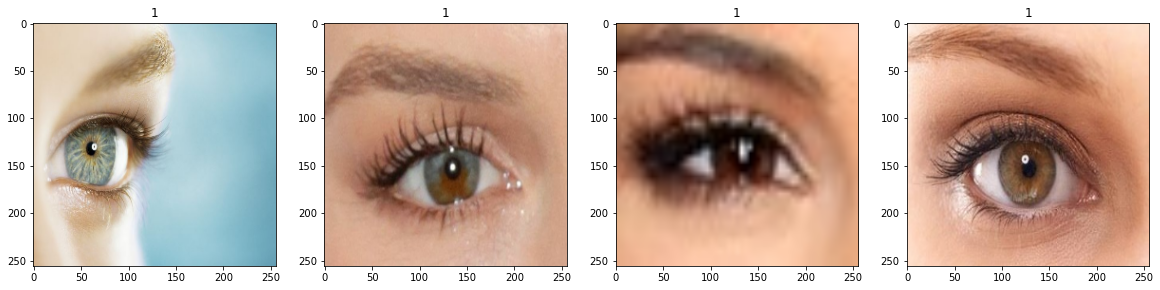

In [11]:
#Batches(0-have cataract, 1- No cataract)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

# Preprocessing Data

Dividing our pixels images values by the maximium scale to be between
0 and 1 instead of 0 to 255, it will improve the model performance in time of train

x - images

y - labels(target variables)

In [12]:
data = data.map(lambda x,y: (x/255, y))

In [13]:
#pick up the first batch in the dataset
data.as_numpy_iterator().next()

(array([[[[0.35420954, 0.28754288, 0.2091115 ],
          [0.3593955 , 0.29272884, 0.21429746],
          [0.38533893, 0.31867227, 0.24808404],
          ...,
          [0.4698958 , 0.4346017 , 0.37577817],
          [0.5023744 , 0.46691942, 0.4081495 ],
          [0.48485017, 0.43779135, 0.3828894 ]],
 
         [[0.34464544, 0.27797878, 0.19954741],
          [0.36634207, 0.2996754 , 0.22124404],
          [0.3746976 , 0.30803093, 0.2374427 ],
          ...,
          [0.44273794, 0.4074438 , 0.34862027],
          [0.48185757, 0.4464026 , 0.3876327 ],
          [0.4904779 , 0.44341907, 0.3885171 ]],
 
         [[0.35194248, 0.28527582, 0.20684443],
          [0.3585787 , 0.29191202, 0.21348067],
          [0.38419002, 0.31752333, 0.24693511],
          ...,
          [0.48394564, 0.44865152, 0.389828  ],
          [0.47154987, 0.4360949 , 0.377325  ],
          [0.4643244 , 0.4172656 , 0.36236364]],
 
         ...,
 
         [[0.4010245 , 0.35396567, 0.29122058],
          [0.41771

# Data into Train, Test and Validation

In [14]:
#Dividing the data into: 70% for train, 20% for validation, and 10% for test
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build The Classification Model

Will use Neural Network(Deep Learning)

In [16]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
#Choose sequencial its easy when we have got one data input an one data output
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
#Will use 'adam' optimizer, and accuracy as measurer to see how the model performs
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Train the model

In [22]:
logdir='logs'

In [23]:
#Saving the model in this checkpoint
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
#Take in the training data and validate with the validation data
#Store the training process in the variable history
history = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 27s 2s/step - loss: 0.8110 - accuracy: 0.5848 - val_loss: 0.6108 - val_accuracy: 0.5781
Epoch 2/20
14/14 [==============================] - 22s 1s/step - loss: 0.5408 - accuracy: 0.7790 - val_loss: 0.5352 - val_accuracy: 0.7969
Epoch 3/20
14/14 [==============================] - 20s 1s/step - loss: 0.4517 - accuracy: 0.7946 - val_loss: 0.3782 - val_accuracy: 0.8203
Epoch 4/20
14/14 [==============================] - 20s 1s/step - loss: 0.3458 - accuracy: 0.8661 - val_loss: 0.3202 - val_accuracy: 0.8438
Epoch 5/20
14/14 [==============================] - 24s 2s/step - loss: 0.3021 - accuracy: 0.8594 - val_loss: 0.2427 - val_accuracy: 0.9375
Epoch 6/20
14/14 [==============================] - 21s 1s/step - loss: 0.2720 - accuracy: 0.8795 - val_loss: 0.3002 - val_accuracy: 0.8672
Epoch 7/20
14/14 [==============================] - 22s 1s/step - loss: 0.2399 - accuracy: 0.9129 - val_loss: 0.1869 - val_accuracy: 0.9375
Epoch 8/20
14/14 [==

# See the performance on the graph(Ploting)

Loss - The difference between real value and the predicted

val_loss - loss on the validation set

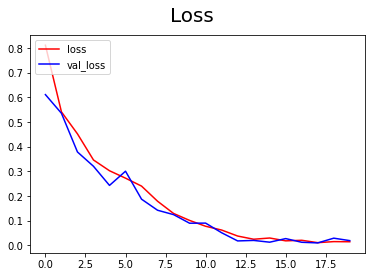

In [25]:
fig = plt.figure()
plt.plot(history.history['loss'], color='red', label='loss')
plt.plot(history.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

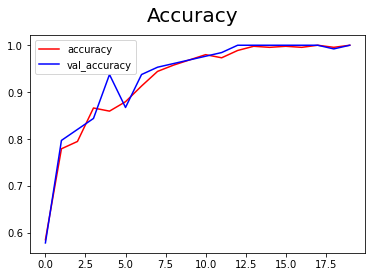

In [26]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='red', label='accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate and Teste

Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predicted = model.predict(X)
    pre.update_state(y, predicted)
    re.update_state(y, predicted)
    acc.update_state(y, predicted)

1/1 [==============================] - 0s 213ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


It's better now, and its seen from the graph that have low probability for overfiting!

 Test

Now i will choose another image out from the dataset to classify if is is "No Cataract" or "Cataract"

In [31]:
import cv2

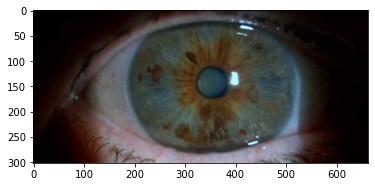

In [32]:
img = cv2.imread('C:\\Users\\Agostinho\\HD\\Cursos\\ICT4Dev\\Machine Learning\\Projecto\\ML_Project\\net.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

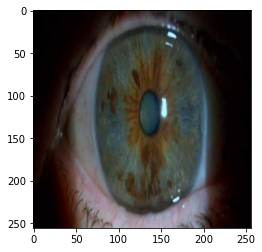

In [33]:
#To train our model we resized the images, so now to test the model, we have to resize in the same way
resize = tf.image.resize(img, (256,256))
#final_resize = resize.numpy().astype(int)
final_resize = resize.numpy().astype('uint8')
final_resize = cv2.cvtColor(final_resize, cv2.COLOR_BGR2RGB)
plt.imshow(final_resize)
plt.show()

In [34]:
predicted = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [35]:
predicted

array([[2.5127767e-08]], dtype=float32)

In [36]:
if predicted > 0.5: 
    print('Predicted class is: No Cataract')
else:
    print('Predicted class is: Cataract')

Predicted class is: Cataract
